In [1]:
//%jsroot on
TH1D *tdiff=new TH1D("tdiff","td-tu",140,-20,50);  
TCanvas *c1=new TCanvas("c1","c1");

Double_t tu, td;
Double_t ctof,tof,x;
int pid;
TFile *ipf=new TFile("tree.root");//打开ROOT文件
TTree *tree=(TTree*)ipf->Get("tree");//得到tree的指针

tree->SetBranchAddress("tu",&tu);   
tree->SetBranchAddress("td",&td);
tree->SetBranchAddress("ctof",&ctof);
tree->SetBranchAddress("tof",&tof);
tree->SetBranchAddress("x",&x);
tree->SetBranchAddress("pid",&pid);

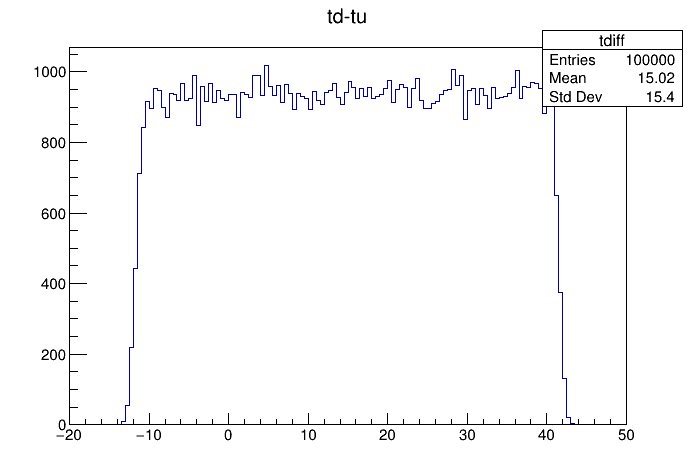

In [2]:
Long64_t nentries=tree->GetEntries();//得到事件总数
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对每个事件进行遍历
    tree->GetEntry(jentry);
    tdiff->Fill(td-tu);  // if(ng==1) tx->Fill(tu-td), 只写入满足给定条件的事件      
  }
tdiff->Draw();
c1->Draw();

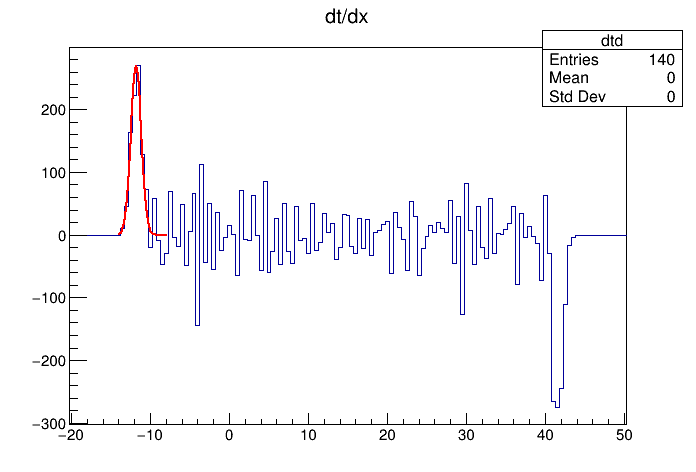

 FCN=198.181 FROM MIGRAD    STATUS=CONVERGED      93 CALLS          94 TOTAL
                     EDM=4.01119e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.68266e+02   1.09660e+01   6.24434e-02   7.55251e-05
   2  Mean        -1.17669e+01   2.39895e-02   1.65051e-04   1.55519e-02
   3  Sigma        6.64412e-01   1.74235e-02   3.21333e-05   7.10636e-03


In [3]:
TH1D *dtd=new TH1D("dtd","dt/dx",141,-20.25,50.25);
for(int i=1;i<=tdiff->GetNbinsX();i++) {
    Double_t df=tdiff->GetBinContent(i+1)-tdiff->GetBinContent(i);
    dtd->Fill(tdiff->GetBinLowEdge(i+1),df);
}
dtd->Sumw2(0);//不显示传递误差
dtd->Draw();
dtd->Fit("gaus","","",-14,-8);//txl
c1->Draw();

In [4]:
TF1 *f1 = new TF1("f1","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)",39.5,43);//定义函数的方法 TF1
//gaus:f(x) = p0*exp(-0.5*((x-p1)/p2)^2)

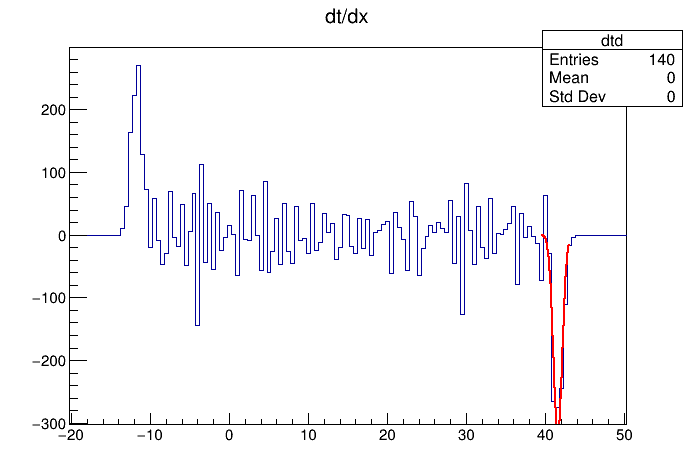

 FCN=191.395 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=8.92334e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -3.20144e+02   1.27464e+01   7.28370e-02  -1.04120e-05
   2  p1           4.16293e+01   2.01138e-02   1.33452e-04  -2.04720e-02
   3  p2           5.58871e-01   1.30306e-02   7.35669e-05   9.62904e-03


In [5]:
//进行参数拟合时，设置合理的初始参数至关重要！
c1->SetLogy(0);
f1->SetParameter(0,-350);//大致估计范围
f1->SetParameter(1,41.5);
f1->SetParameter(2,0.5);
dtd->Fit("f1","R");
dtd->Draw();
c1->Draw();

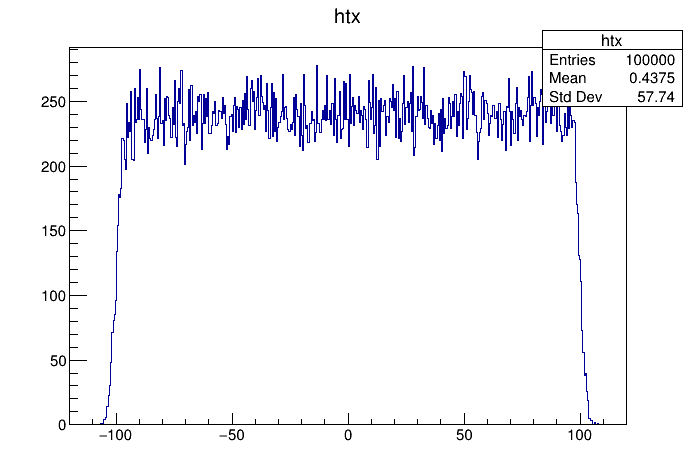

In [6]:
TH1D *htx=new TH1D("htx","htx",500,-120,120);
TH2D *hdx=new TH2D("hdx","htx-hx:hx",100,-20,20,500,-120,120);
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree->GetEntry(jentry);
    Double_t tx=3.750*(td-tu-14.90);
    htx->Fill(tx);
    hdx->Fill(tx-x,x);//difference
  }
htx->Draw();
c1->Draw();

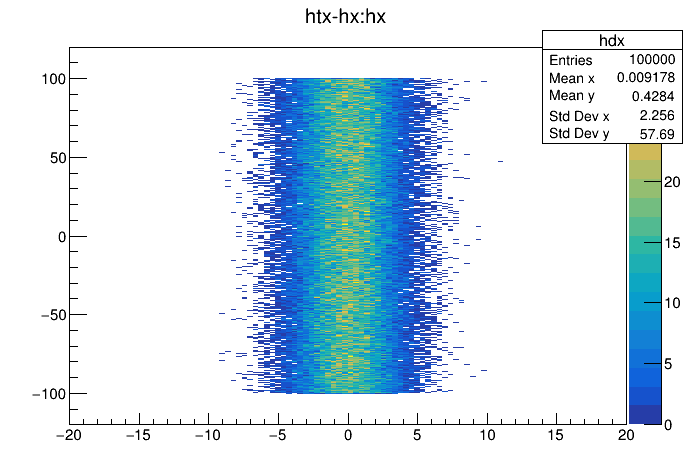

In [7]:
hdx->Draw("colz");//为一条竖线，没有关联
c1->Draw();

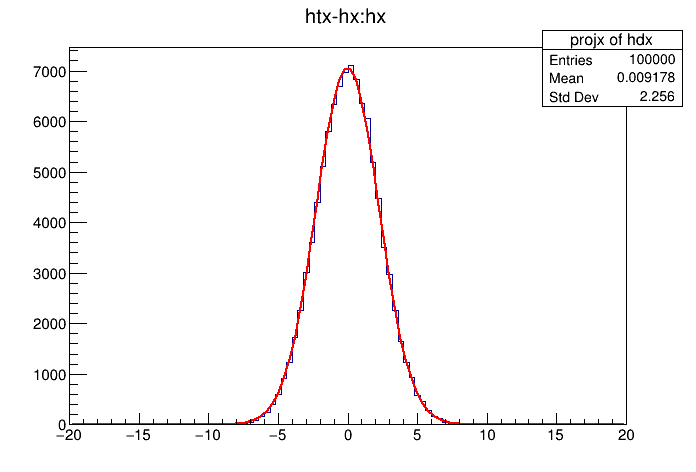

 FCN=58.9957 FROM MIGRAD    STATUS=CONVERGED      50 CALLS          51 TOTAL
                     EDM=2.54599e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.06563e+03   2.73534e+01   8.45379e-02  -9.07261e-06
   2  Mean         7.32532e-03   7.14179e-03   2.70112e-05  -4.71911e-04
   3  Sigma        2.25722e+00   5.04006e-03   2.29909e-06  -3.25353e-01


In [8]:
TH1D *hdx1=hdx->ProjectionX("projx of hdx");
hdx1->Draw();
hdx1->Fit("gaus");//如果中心值 mean x偏离0, 说明确定td-tu的边界时可能有些问题。[3],[6]
c1->Draw();

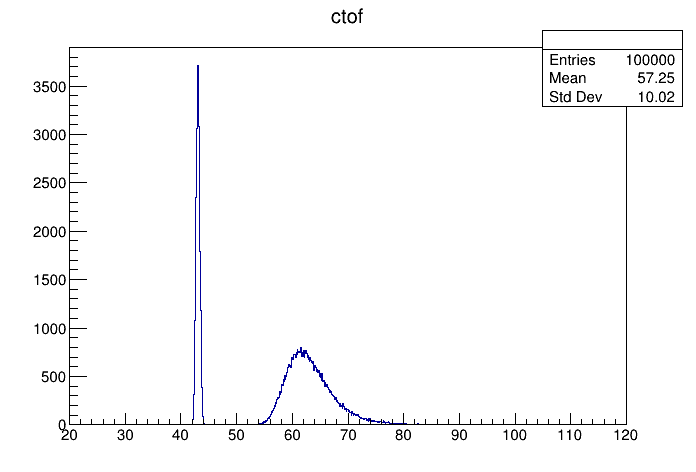

In [9]:
tree->Draw("ctof>>(1000,20,120)");
c1->Draw();

In [10]:
TH2D *hgtofx=new TH2D("hgtofx","hgtofx",100,-120,120,100,39,48);
TH1D *hgctof=new TH1D("hgctof","hgctof",100,39,48);

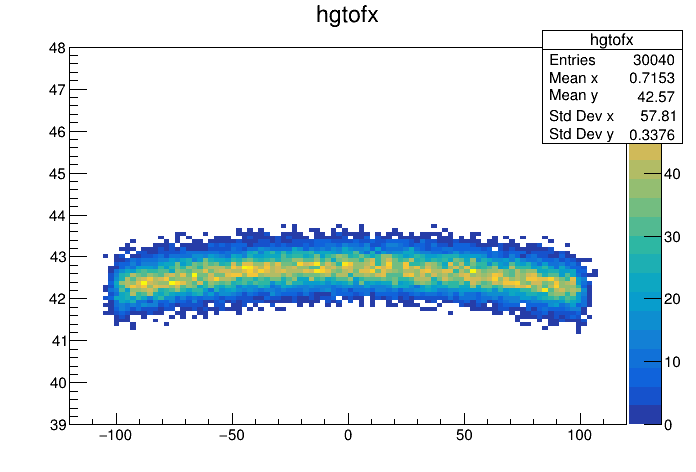

In [11]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree->GetEntry(jentry);
    Double_t tx=3.745*(td-tu-14.75);
    if(ctof>42&& ctof<44.5) { //选择gamma
        Double_t d=TMath::Sqrt(502.5*502.5+tx*tx);
        Double_t ctofa=(ctof)/d*500.;//normalized to 500cm
        hgtofx->Fill(tx,ctofa);
        if(abs(tx)<5) hgctof->Fill(ctof);//gamma hits the center of the det.
    }
  }
hgtofx->Draw("colz");
c1->Draw();

In [12]:
TH1D *hC=new TH1D("hC","",300,-40,-10);
TH2D *hCx=new TH2D("hCx","",100,-105,105,300,-30,-23);

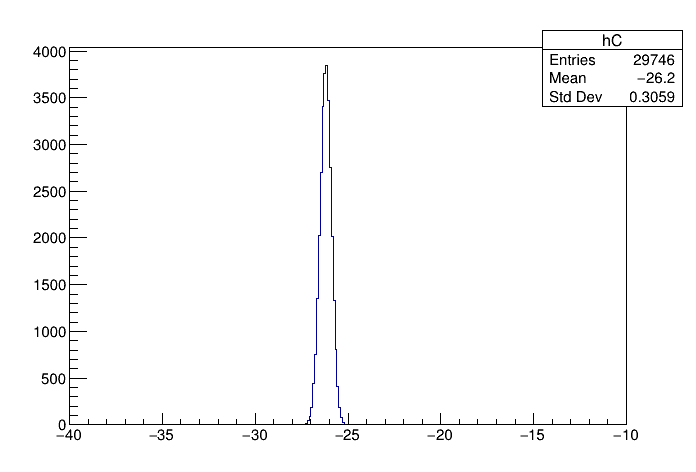

In [13]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {
    tree->GetEntry(jentry);
    Double_t tx=3.745*(td-tu-14.75);
    if(tx>-100 && tx<100 && ctof>42&& ctof<44.5) {//gamma
        Double_t d=TMath::Sqrt(502.5*502.5+tx*tx);
        hC->Fill(3.333*d*0.01-ctof);
        hCx->Fill(tx,3.333*d*0.01-ctof);
    }
  }
hC->Draw();
c1->Draw();

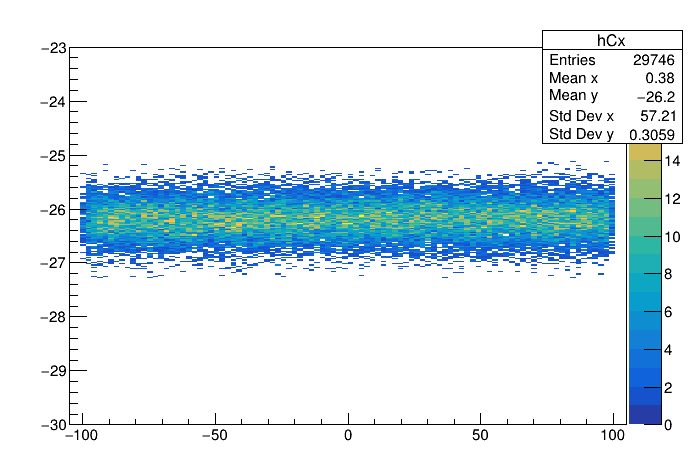

In [14]:
hCx->Draw("colz");//检验C与x是否有关联
c1->Draw();

In [15]:
TH1D *htof=new TH1D("tof","",500,0,100);//real TOF, normalized to 500cm
TH1D *htofc=new TH1D("tofc","",500,0,100);//calculated TOF, normalized to 500cm
TH2D *htofcx=new TH2D("htofcx","htofcx",100,-120,120,100,12,22);

In [16]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {
    tree->GetEntry(jentry);
    Double_t tx=3.745*(td-tu-14.75);
    Double_t d=TMath::Sqrt(502.5*502.5+tx*tx);    
    htof->Fill(tof/d*500);
    htofc->Fill((ctof-26.2)/d*500);
    if(ctof>42&& ctof<44.5)
        htofcx->Fill(tx,(ctof-26.2)/d*500);
  }

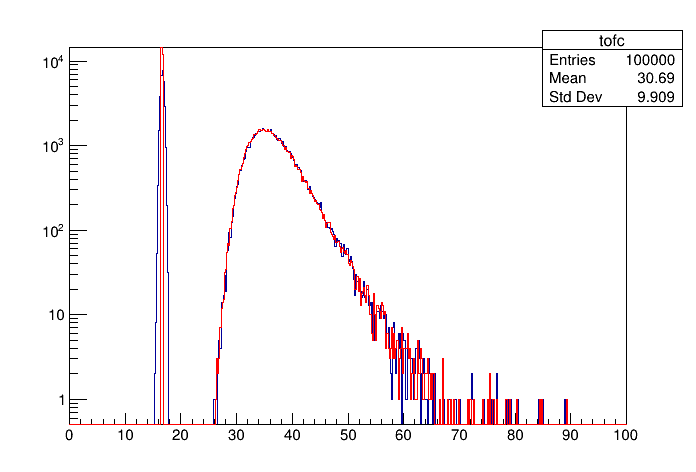

In [17]:
c1->SetLogy();
htofc->Draw();//修正后的飞行时间谱
htof->SetLineColor(kRed);
htof->Draw("same");
c1->Draw()

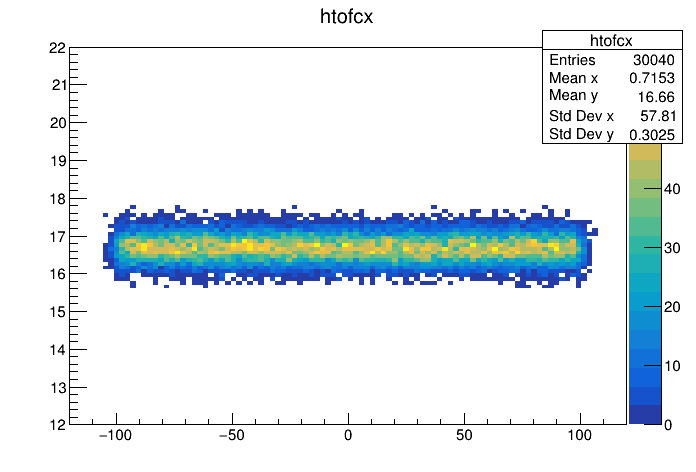

In [18]:
c1->SetLogy(0);
htofcx->Draw("colz");
c1->Draw();

In [20]:
!jupyter nbconvert 1.2_read_tree.ipynb --to html

[NbConvertApp] Converting notebook 1.2_read_tree.ipynb to html

[NbConvertApp] Writing 439989 bytes to 1.2_read_tree.html

